<a href="https://colab.research.google.com/github/rostiman1/BattleArmies/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks
Welcome to the third assignment! In this assignment, you will make a 2 layer neural network for data classification where we will be dividing the regions between red and blue. Through this assignment, you will go through all the steps required for building a shallow 2 layered neural network consisting of 1 hidden layer and 1 output layer.

**You will learn to:**
- This assignment will help you in building the general architecture of your first neural network with 1 hidden layer and steps include:
    - Initializing parameters
    - Forward Propagation
    - Backward Propagation
    - Gradient descent to improve the algorithm
- Collect all the above functions into a single function in the correct order and this function will act as a main model.

**NOTE:** Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

### Recommended Reading

-   [Chapter 3](https://livebook.manning.com/book/deep-learning-with-python/chapter-3) of "Deep Learning with Python" by F. Chollet.
- [Artificial Neural networks](https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf)
- [Neural networks and Backpropagation](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)
- Building Neural Network from [scratch](https://towardsdatascience.com/coding-a-2-layer-neural-network-from-scratch-in-python-4dd022d19fd2)
-  [Activation functions](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) - Sigmoid, tanh, Softmax, ReLU, Leaky ReLU
- Artificial neural networks [explained](http://scs.ryerson.ca/~aharley/neural-networks/)
- Building a 2 layered neural network for [3 class classification problem](https://cs231n.github.io/neural-networks-case-study/)

#### Derivatives and Gradients

- https://www.mathsisfun.com/calculus/derivatives-introduction.html
- (chapters 3-4) https://openstax.org/books/calculus-volume-1/pages/3-1-defining-the-derivative#27277

### Additional Material (Optional!)

- how ANN can [represent complex functions](http://neuralnetworksanddeeplearning.com/chap4.html)
- <a href='http://faroit.com/keras-docs/2.0.2/getting-started/faq/#what-does-sample-batch-epoch-mean'>What does "sample", "batch", "epoch" mean? From Keras FAQ </a>


**efficiently computing gradients via backpropagation:**
- intro level [3blue1brown educational series](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
- more in-depth explanation [cs231n Stanford course](https://www.youtube.com/watch?v=d14TUNcbn1k)


**Regression task with ANN**

- Deep Learning with Python F.Chollet, [chapter 3.6](https://livebook.manning.com/book/deep-learning-with-python/chapter-3/271)

- how ANN can [represent complex functions](http://neuralnetworksanddeeplearning.com/chap4.html)

Let's get started


**First of all, mount google drive**

This will mount the google drive for google colab and you will be able access contents of your drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Deep_learning_unit/Assignment3')
folder = os.path.join('/content/drive/My Drive/Deep_learning_unit/Assignment3')
!ls

Mounted at /content/drive
Assignment3.ipynb  images  planar_utils.py  __pycache__  testCases_v2.py


## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this exercise.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

- Set a seed using np.random.seed(1) so that the results are consistent.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_datasets

%matplotlib inline

np.random.seed(1)

## 2 - Noisy moons dataset ##

Noisy moons dataset displays 2 disjunctive clusters of data points in a 2-dimensional representation space ( with coordinates x1 and x2 for two features). You will design the simple neural nwtwork to classify the data points in two classes blue or red.

First, let's get the dataset you will work on. The following code will load a "Noisy moons" 2-class dataset into variables `X` and `Y`.

In [3]:
#noisy_moons = sklearn.datasets.make_moons(n_samples=400, noise=.2)
#X, Y = noisy_moons
noisy_moons = load_datasets()

datasets = {"noisy_moons": noisy_moons}

X, Y = datasets["noisy_moons"]
X, Y = X.T, Y.reshape(1, Y.shape[0])

Visualize the dataset using matplotlib. The data looks like a "two cresecent moons" with some red (label y=0) and some blue (y=1) points. You will build a classifier to fit this data by defining the regions as either red or blue.

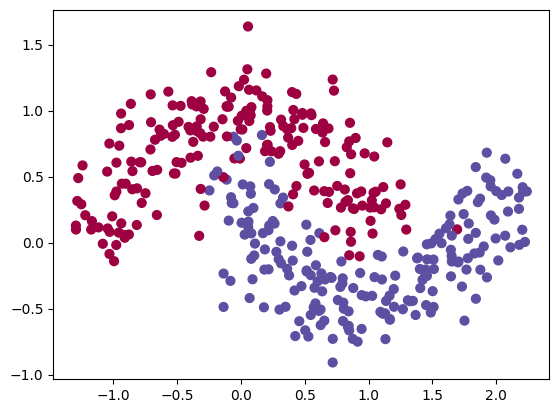

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Calculate the number of training examples? In addition, what is the `shape` of the variables `X` and `Y`?


Hint: You can use the shape function to get the above values. m represents the number of training examples

In [6]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m =   X.shape[1]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Expected Output**:
       
<table style="width:20%">
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td>
  </tr>
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td>
  </tr>
     <tr>
    <td>**m**</td>
    <td> 400 </td>
  </tr>
  
</table>

## 3 - Try Logistic Regression

Let's try logistic regression model before building a full neural network. We will be using sklearn's built-in function to do that. Test the logistic regression model for the classification of the selected dataset and plot the decision boundary using this classifier. The code below trains the logictic regression classifier:

In [8]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Code below plots the decision boundary for logistic regression and also calculates the accuracy of the model:

Accuracy of logistic regression: 86 % (percentage of correctly labelled datapoints)


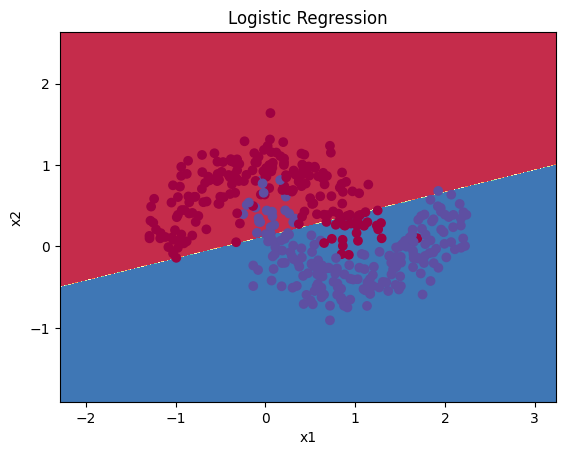

In [9]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 86% </td>
  </tr>
</table>


**Interpretation**: As you can see that some of the data points are non-linearly separable, hence we need an improved model to better define the boundary of our dataset.

Now, we will try neural network for the same problem.

## 4 - Neural Network model

We are going to build a 2 layered neural network with 1 hidden layer. You will learn how to:

**Step 1 - "Initialization".** Choose a first guess (e.g. using random number generators) for the ANN weights.

**Step 2 - "Forward Pass".** Compute the predicted labels $\hat{y}^{(i)}$ for a randomly chosen subset (batch) of the training set.

**Step 3 - "Backward Pass".** Compute loss and calculate derivative for the gradient of the loss for the resulting prediction errors ${y}^{(i)} - \hat y^{(i)}$.  

**Step 4 - "Gradient Step".** Update the ANN weights by taking a (small) step into the opposite direction of the gradient: $\mathbf{w} \mapsto \mathbf{w} - \alpha * d(\mathbf{w})$.

See the figure below for schematic representation of these steps.

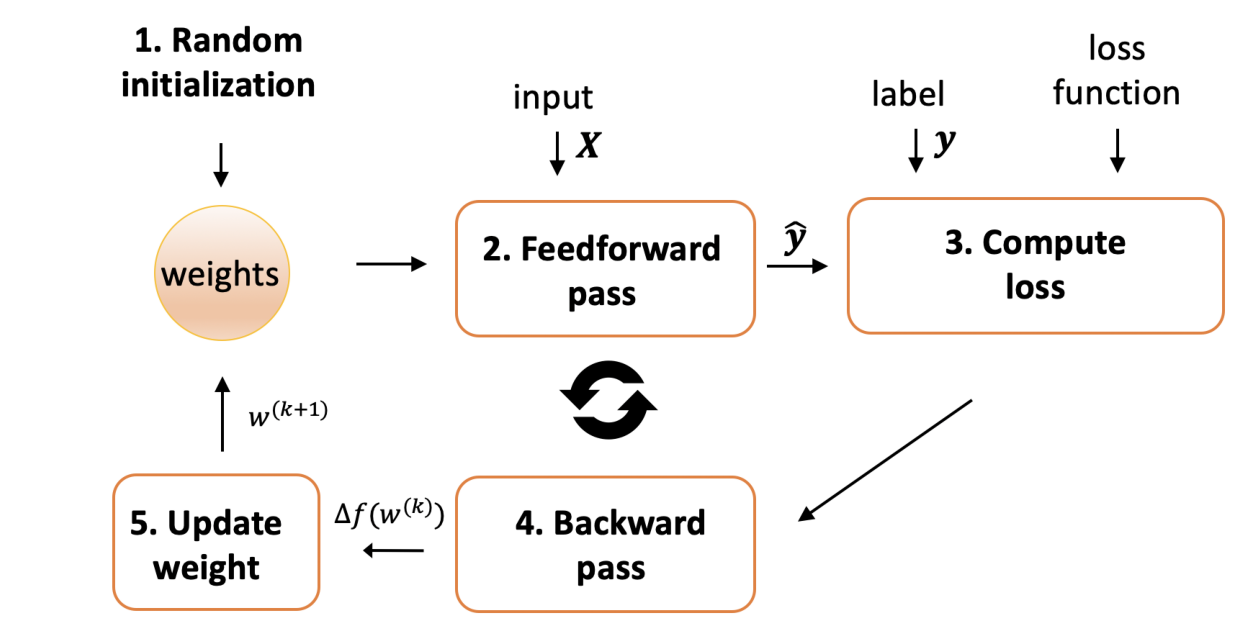

In [10]:
plt.figure(figsize=(20,8))
img=plt.imread('/content/drive/My Drive/Deep_learning_unit/Assignment3/images/ANN_cycle.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**NEURAL NETWORK ARCHITECTURE**

The general methodology to build a Neural Network is to:
  1. Define the neural network structure ( # of input units,  # of hidden units, etc).
  2. Initialize the model's parameters
  3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

Let us define the neural network architecture and see how our model look look like:

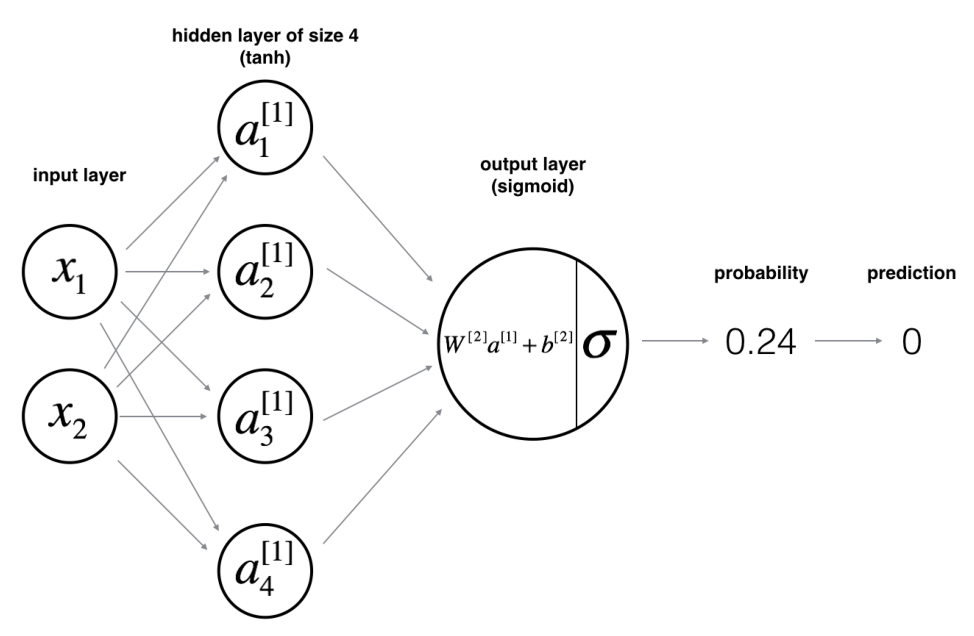

In [11]:
plt.figure(figsize=(20,8))
img=plt.imread('/content/drive/My Drive/Deep_learning_unit/Assignment3/images/classification_kiank.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### 4.1 - Neural network structure ####
We design an ANN with 3 layers: 1 input layer, 1 hidden layer and 1 output layer but often refereed as 2 layered Neural network (2 layers counted are hidden and output). The hidden layers are called "hidden", because in contrast to input and output layers we cannot directly access the inputs and outputs of the hidden layers.

 **input layer**. As customary in the deep learning literature, we refer to the input features $x_{1},\ldots,x_{n}$ of a data point as the input layer. The example below includes 2 features values $x_{1},x_{2}$.

**layer 1 - hidden layer** This layer consists of 4 neurons. Each neuron in this layer receives the input from all neurons of the previous layer. This type of layers are called fully connected or densely connected layer or **dense layer**.

**layer 2 - output layer** This layer consists of one output neuron. The output neuron represents a particular class and the output value represents the confidence in assigning the data point to the class.

We use the following variables for defining the number of nodes in each of the layer:
  - n_x: the size of the input layer
  - n_h: the size of the hidden layer
  - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. We will use the number of nodes in hidden layer as 4 hard code the hidden layer size to be 4.

In [12]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]


    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [13]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


**Expected Output**

<table style="width:20%">
  <tr>
    <td>n_x</td>
    <td> 2 </td>
  </tr>
    <tr>
    <td>n_h</td>
    <td> 4 </td>
  </tr>
    <tr>
    <td>n_y</td>
    <td> 1 </td>
  </tr>
  
</table>

### 4.2 - Parameter initialization ####

- You will initialize the weights matrices with random values.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros.
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

Make sure your parameters' sizes are right. Refer to the neural network figure above if required.


In [25]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [26]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**Expected Output**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td>
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td>
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td>
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td>
  </tr>
  
</table>



### 4.3 - Forward propagation ####
The forward propagation calculates the $Z^{[1]}$, $A^{[1]}$ and $Z^{[2]}$ $A^{[2]}$ for the hidden layer and the output layer. Mathematically, they can be represented as:

$x^{(i)}$:
$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{y} = a^{[2]} = \sigma(Z^{ [2]})\tag{4}$$
For one example;
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, the cost $J$ can be computed as follows:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$



When we multiply matrices, as in the product $W^{[1]} X$ and $W^{[2]} A^{[1]}$ , the dimensions of those matrices have to be correct in order for the product to be possible. That’s why it’s essential to set the dimensions of our weights and biases matrices right.

- W1: **Shape is (n_h, n_x)** where n_h is the number of hidden units of that layer and n_x is the number of features/rows of the previous layer (in this case X, our input data).
- b1: **Shape is (n_h, 1)** where n_h is the number of hidden nodes of that layer. It always has the same number of rows as W1 and a single column.
- W2: **Shape is (n_y, n_h)** where n_y is the number of units of that output layer and n_h is the number of nodes of the previous layer (hidden layer in our case).
- b2: **Shape is (n_y, 1)** where n_y is the number of nodes of that layer. It always has the same number of rows as W2 and a single column.





**The steps you have to implement are:**

1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set)
3. Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

**Note**:

- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.



In [34]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]



    ### END CODE HERE ###

    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    ### END CODE HERE ###

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [35]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


**Expected Output**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td>
  </tr>
</table>

####**Cost Function**

Now that you have computed $A^{[2]}$ ( "`A2`" in the code), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$



In [54]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

     # retrieve the number of example
    ### START CODE HERE ### (≈ 1 lines of code)
    m = Y.shape[1]
    ### END CODE HERE ###

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1/m*np.sum(np.log(A2)* Y +  np.log(1-A2)*(1-Y))
    ### END CODE HERE ###

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

In [55]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


**Expected Output**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.6930587610394646 </td>
  </tr>
  
</table>

###4.4 Backward Propagation

Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  


$ \partial Z^{[2]}  = A^{[2]} - Y$

$\partial W^{[2]}  = \frac{1}{m} \partial Z^{[2]} A^{[1]T}$

$\partial b^{[2]} = \frac{1}{m} np.sum (\partial Z^{[2]}, axis=1, keepdims=True)$

$ \partial Z^{[1]}  =  W^{[2]T} \partial Z^{[2]} *  g^{[1]'}(Z^{[1]})$

$\partial W^{[1]}  = \frac{1}{m} \partial Z^{[1]} X^{T}$

$\partial b^{[1]} = \frac{1}{m} np.sum (\partial Z^{[1]}, axis=1, keepdims=True)$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use in coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
- To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, so for $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute $g^{[1]'}(Z^{[1]})$ as $(1 - A^{[1]^2})$

**HINT:** Use np.power function

In [60]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    # retrieve the number of example
    ### START CODE HERE ### (≈ 1 lines of code)
    m = X.shape[1]
    ### END CODE HERE ###

    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###

    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 =  cache["A2"]

    ### END CODE HERE ###

    # Backward propagation: calculate dZ2, dW2, db2, dZ1, dW1, db1.
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2-Y
    dW2 = 1./m*np.dot(dZ2, A1.T)
    db2 = 1./m*np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1./m* np.dot(dZ1, X.T)
    db1 = 1./m*np.sum(dZ1, axis = 1, keepdims=True)





    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [61]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Expected output**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td>
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td>
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td>
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td>
  </tr>
  
</table>  

### 4.5 Gradient descent

**Gradient descent (GD)** constructs a sequence of weight vectors $\mathbf{w}^{(0)},\mathbf{w}^{(1)},\ldots$ such that the loss function tends toward the minimum loss. The GD algorithm requires the specification of a suitable learning rate  $\alpha$ and initial guess $\mathbf{W}^{[l]}$ and then repeating the gradient step for a sufficient number of iterations. One possible stopping criterion is to use a fixed number of iterations. Another option is to monitor the loss function and stop if consecutive iterates do not result in any significant decrease.

A key challenge in the use of GD is to find a good choice for the learning rate $\alpha$. If the learning rate is too small (plot below), the GD steps make too little progress and thus requires an excessive number of iterations to get close to the optimum weight vector.

Run the code below to see the example of the gradient descent algorithm with a good learning rate (converging). Images courtesy of Adam Harley.


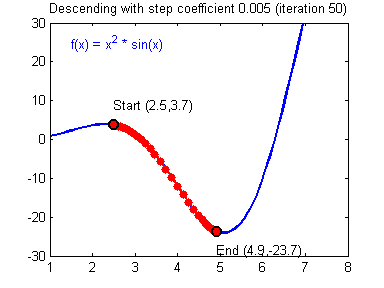

In [62]:
from IPython.display import Image
Image(open('/content/drive/My Drive/Deep_learning_unit/Assignment3/images/sgd.gif','rb').read())

Conversely, if the learning rate is too high (right plot below), it is possible that as GD iterates $\mathbf{w}$ will "overshoot" the minimum and climb up the loss function on the other side of the minimum (GD diverges).

An example of the gradient descent algorithm with a bad learning rate (diverging) is shown below.

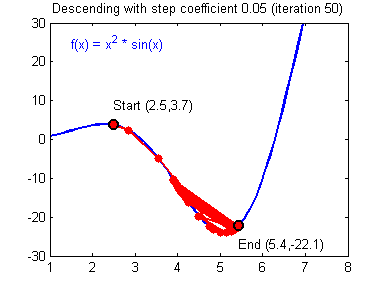

In [63]:
from IPython.display import Image
Image(open('/content/drive/My Drive/Deep_learning_unit/Assignment3/images/sgd_bad.gif','rb').read())

**Update Parameters**

Now use gradient descent to update the parameters (W1, b1, W2, b2) using the calcilated derivatives (dW1, db1, dW2, db2) in backprop.

**You can use this formula to update your parameters:**

 $ \theta = \theta - \alpha * \partial \theta $ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [64]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]



    ### END CODE HERE ###

    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate
    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate



    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [65]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Expected Output**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td>
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td>
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td>
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td>
  </tr>
  
</table>  

###4.6 - Neural network model  

Now is the time to integrate all the functions created above in the right order into a single function called `nn_model()`.

The functions which need to be used are:
- initialize_parameters(n_x, n_h, n_y)
- forward_propagation(X, parameters)
- compute_cost(A2, Y, parameters)
- backward_propagation(parameters, cache, X, Y)
- update_parameters(parameters, grads, learning_rate = 1.2)

Call the above functions in the right order with right parameters in the code below:

In [67]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # Retrieve the values of n_x and n_y from X and Y
    ### START CODE HERE ### (≈ 2 lines of code)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Call all the 4 functions listed above in right order
        ### START CODE HERE ### (≈ 4 lines of code)
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)



        ### END CODE HERE ###

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [68]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


**Expected Output**:

<table style="width:90%">
<tr>
    <td>
        **cost after iteration 0**
    </td>
    <td>
        0.692739
    </td>
</tr>
  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td>
  </tr>  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td>
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td>
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td>
  </tr>
  
</table>  

### 4.7 Predictions

 Use your model to predict by building predict().
Use forward propagation to predict results.

 predictions = $y_{prediction}$ = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}  
    

In [69]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5

    ### END CODE HERE ###

    return predictions

In [70]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


**Expected Output**:


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td>
  </tr>
  
</table>

**Run model**

It is time to run the model and see how it performs on a moons dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

Cost after iteration 0: 0.692996
Cost after iteration 1000: 0.083459
Cost after iteration 2000: 0.075389
Cost after iteration 3000: 0.072353
Cost after iteration 4000: 0.071086
Cost after iteration 5000: 0.070418
Cost after iteration 6000: 0.069969
Cost after iteration 7000: 0.069636
Cost after iteration 8000: 0.069378
Cost after iteration 9000: 0.069172


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

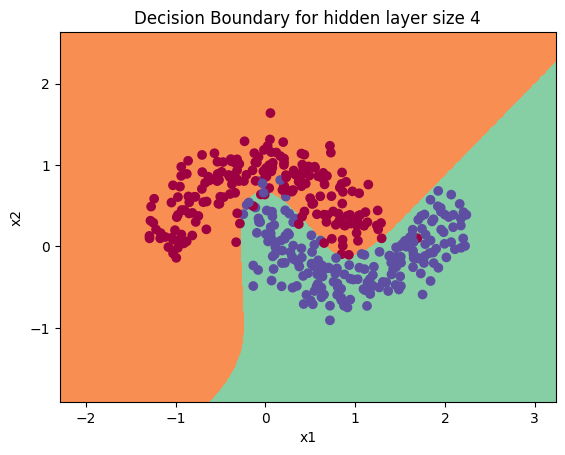

In [73]:
# Build a model with a n_h-dimensional hidden layer
# Call the nn_model function for your dataset
 ### START CODE HERE ### (≈ 1 lines of code)
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
 ### END CODE HERE ###

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.069172 </td>
  </tr>
  
</table>


In [74]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 97%


**Expected Output**:

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 97% </td>
  </tr>
</table>

Accuracy is really high compared to Logistic Regression. The model has learnt the patterns of the dataset! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.


### 5 - Further experiments

Let's try to change the hidden layer sizes and see how our model performs. Run the following code and you will observe different behaviors of the model for various hidden layer sizes.

**Note** It may take upto 2 minutes to run

Accuracy for 1 hidden units: 87.0 %
Accuracy for 2 hidden units: 87.25 %
Accuracy for 3 hidden units: 96.75 %
Accuracy for 4 hidden units: 97.75 %
Accuracy for 5 hidden units: 97.5 %
Accuracy for 10 hidden units: 97.5 %
Accuracy for 30 hidden units: 86.75 %


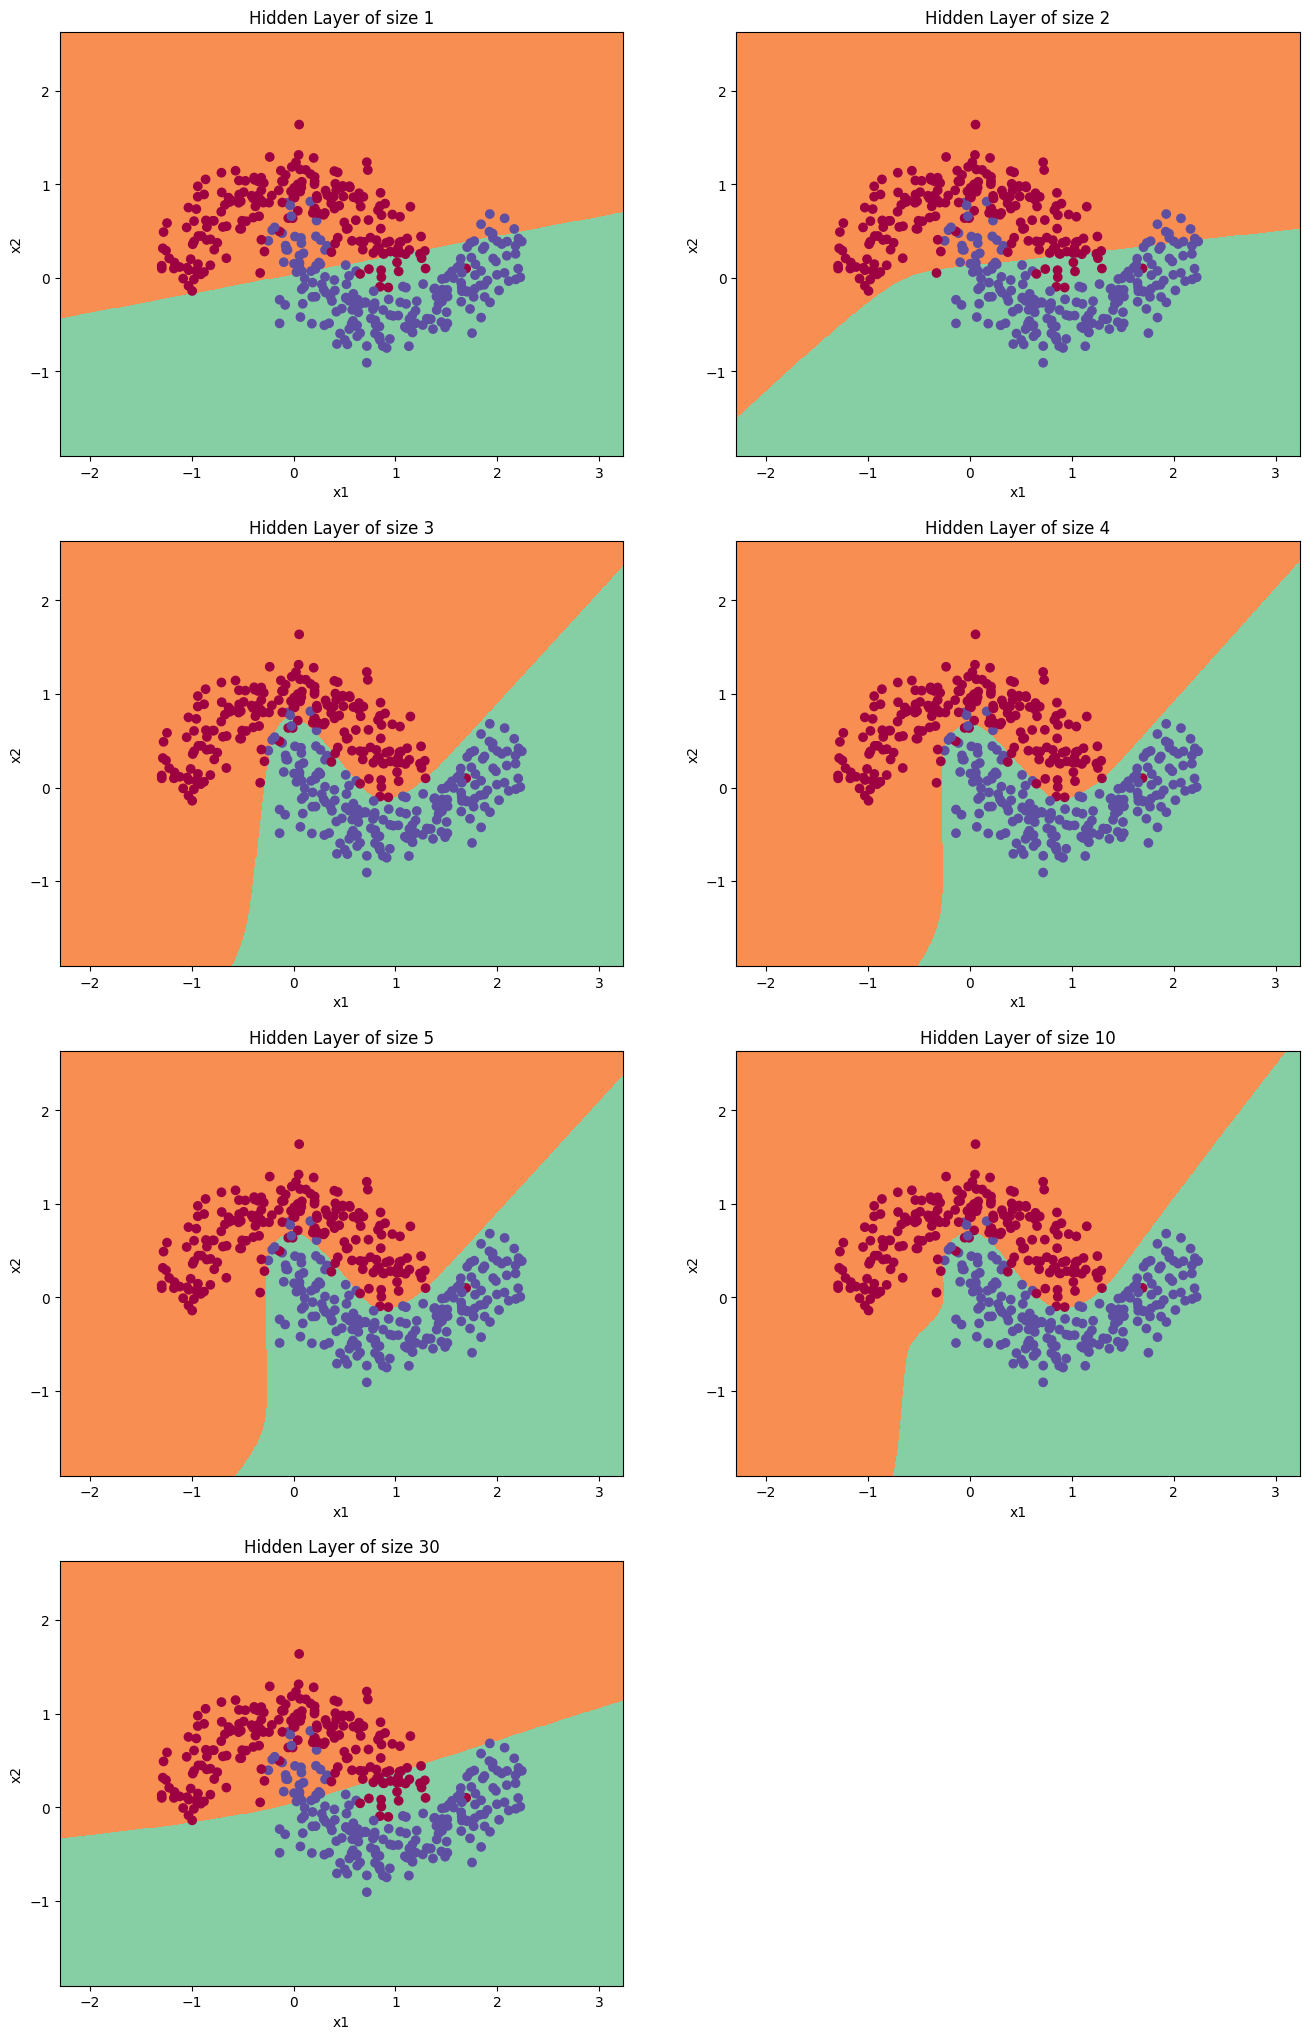

In [75]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 30]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models starts behaving worst.
- The best hidden layer size seems to be around n_h = 4. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.